# Dimensional Reduction - Principal Component Analysis (PCA)

## Tutorial on PCA

In [39]:
import numpy as np
import matplotlib.pyplot as plt
#would be great to plot the points in 3D
#from mpl_toolkits.mplot3d import Axes3D

In [40]:
def x_spring(t,A,T):
    return A*np.cos(((2*np.pi)/T)*t)
t = np.linspace(0,60,100)
A, T = 1, 15 #amplitude, period
mu, sigma = 0, 0.1 #noise mean and std
x_0 = x_spring(t,A,T) + np.random.normal(mu,sigma,len(t))
y_0 = np.random.normal(mu,sigma,len(t))
z_0 = np.random.normal(mu,sigma,len(t))
camangles_1 = [23,22,30] #R_x, R_y, and R_z
camangles_2 = [33,90,30]
camangles_3 = [21,180,21]


def rot_x(theta,x,y,z):
    X,Y,Z = x, y*np.cos(theta) - z*np.sin(theta), y*np.sin(theta) + z*np.cos(theta)    
    return [X,Y,Z]
    
def rot_y(theta,x,y,z):
    X = x*np.cos(theta) + z*np.sin(theta)
    Y = y
    Z = -x*np.sin(theta) + z*np.cos(theta)
    return [X,Y,Z]
    
def rot_z(theta,x,y,z):
    X = x*np.cos(theta) - y*np.sin(theta)
    Y = x*np.sin(theta) + y*np.sin(theta)
    Z = z
    return [X,Y,Z]

def get_cam_points(cam_angles,pos_ini):
    fig, axes = plt.subplots(1,4,figsize=(14,5))
    
    x = pos_ini[0]
    y = pos_ini[1]
    z = pos_ini[2]
    
    axes[0].scatter(x,y)
    axes[0].set_xlabel("x")
    axes[0].set_ylabel("y")
    axes[0].set_xlim(-1,1)
    axes[0].set_ylim(-1,1)
    
    new_pos_z = rot_z(cam_angles[0]*(np.pi/180),x,y,z)
    axes[1].scatter(new_pos_z[0],new_pos_z[1])
    axes[1].set_title("rot around Z: " + str(cam_angles[0]) + " deg")
    axes[1].set_xlabel("x")
    axes[1].set_ylabel("y")
    axes[1].set_xlim(-1,1)
    axes[1].set_ylim(-1,1)
    
    new_pos_y = rot_y(cam_angles[1]*(np.pi/180),new_pos_z[0],new_pos_z[1],new_pos_z[2])
    axes[2].scatter(new_pos_y[0],new_pos_y[1])
    axes[2].set_title("rot around Y: " + str(cam_angles[1]) + " deg")
    axes[2].set_xlabel("x")
    axes[2].set_ylabel("y")
    axes[2].set_xlim(-1,1)
    axes[2].set_ylim(-1,1)
    
    new_pos_x = rot_x(cam_angles[2]*(np.pi/180),new_pos_y[0],new_pos_y[1],new_pos_y[2])
    axes[3].scatter(new_pos_x[0],new_pos_x[1])
    axes[3].set_title("rot around X: " + str(cam_angles[2]) + " deg")
    axes[3].set_xlabel("x")
    axes[3].set_ylabel("y")
    axes[3].set_xlim(-1,1)
    axes[3].set_ylim(-1,1)
    
    return new_pos_x


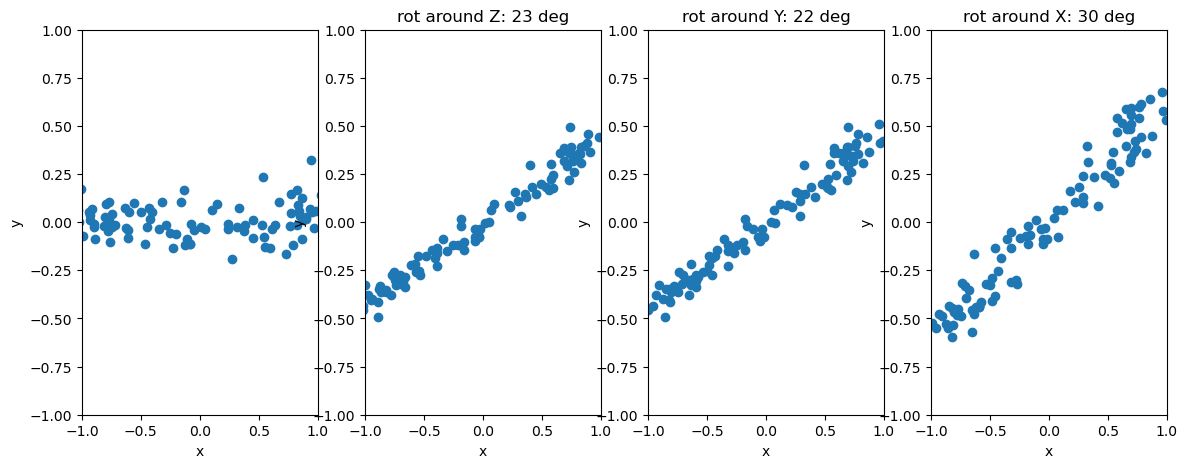

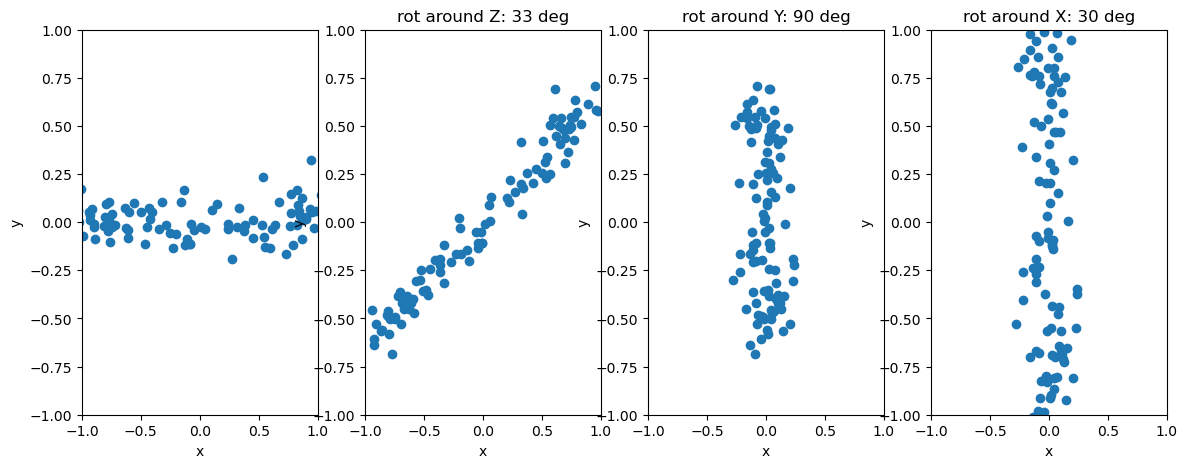

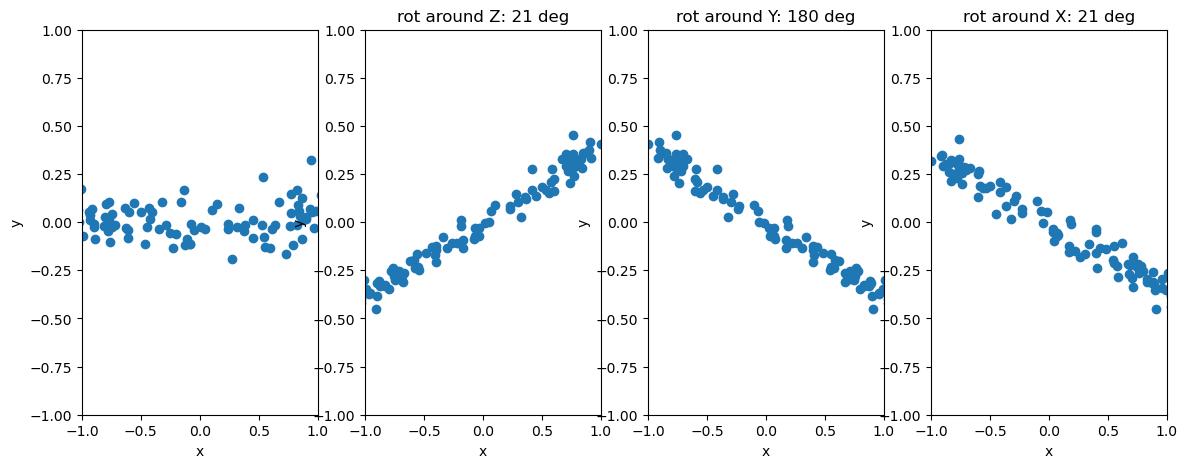

In [41]:
cam_1 = get_cam_points(camangles_1,[x_0,y_0,z_0])
cam_2 = get_cam_points(camangles_2,[x_0,y_0,z_0])
cam_3 = get_cam_points(camangles_3,[x_0,y_0,z_0])

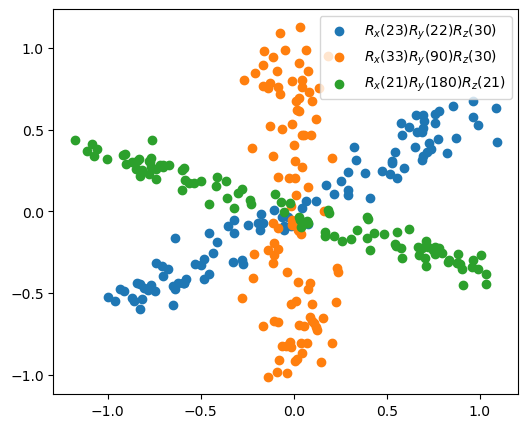

In [42]:
fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(cam_1[0],cam_1[1], label=r"$R_x($"+str(camangles_1[0])+"$)$"+"$R_y($"+str(camangles_1[1])+"$)$"+"$R_z($"+str(camangles_1[2])+"$)$")
ax.scatter(cam_2[0],cam_2[1], label=r"$R_x($"+str(camangles_2[0])+"$)$"+"$R_y($"+str(camangles_2[1])+"$)$"+"$R_z($"+str(camangles_2[2])+"$)$")
ax.scatter(cam_3[0],cam_3[1], label=r"$R_x($"+str(camangles_3[0])+"$)$"+"$R_y($"+str(camangles_3[1])+"$)$"+"$R_z($"+str(camangles_3[2])+"$)$")
ax.legend()

1. Stack each time sample such that we have a matrix $\mathbf{X}$ with each row being data points along a camera axis.

In [43]:
X = np.vstack([cam_1[:-1],cam_2[:-1],cam_3[:-1]]) #leave out z coordinate

2. Subtract mean from each measurement type (centering).

In [44]:
X_center = [x - np.mean(x) for x in X]

3. Calculate the eigenvectors of the covariance matrix, i.e. principal components (PCs) of $\mathbf{X}$.

In [45]:
eigval, eigvec = np.linalg.eigh(np.cov(X_center)) #eigenvectors as columns
print(eigvec)

[[ 0.4887383  -0.31233373 -0.41831963  0.36799288  0.30879891 -0.50775552]
 [ 0.39819862 -0.39990691  0.51298336 -0.34099336 -0.45069372 -0.31457765]
 [-0.13480054 -0.29016265  0.44881814 -0.21719118  0.80553914  0.0114637 ]
 [-0.63330029 -0.20849775 -0.33428656 -0.38235642 -0.09026425 -0.53792923]
 [ 0.19657043 -0.48155717 -0.47509464 -0.43563446 -0.00129159  0.56032918]
 [ 0.3803845   0.61883691 -0.1515144  -0.60428382  0.21089287 -0.19939198]]


4. Calculate projections of $\mathbf{X}$ along PCs. Rank order PCs according to variance explained (we just reverse sort here, I think it depends on the eigenvalues? not sure...).

In [46]:
P = eigvec.T
Y = np.matmul(P,X_center)
Y_sorted = Y[::-1]
eigval_sorted = eigval[::-1]

5. Plot the variance explained per PC.

Text(0, 0.5, 'Variance explained')

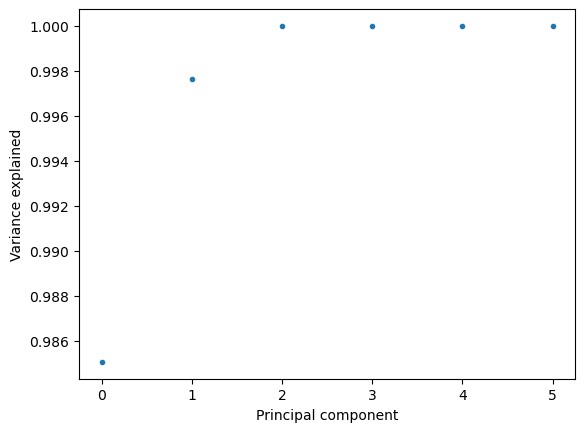

In [47]:
plt.plot(np.cumsum(eigval_sorted)/eigval.sum(), ls = "None", marker = '.')

plt.xlabel("Principal component")
plt.ylabel("Variance explained")

6. Plotting each PC (just to understand how the variances are explained)

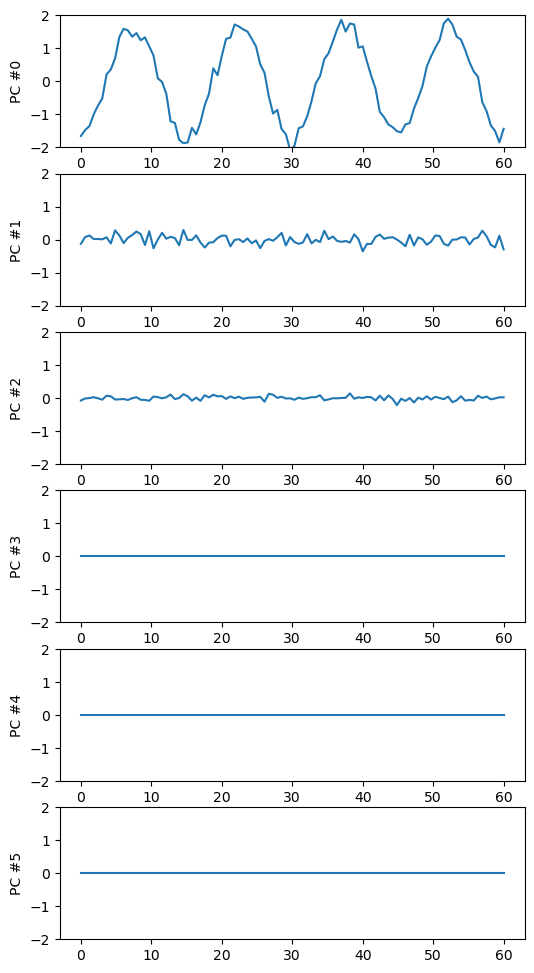

In [48]:
fig, axs = plt.subplots(P.shape[0], 1, figsize = (6,12))

for i, ax in enumerate(axs):
    ax.plot(t, Y_sorted[i])
    ax.set_ylabel("PC #%s" %i)
    ax.set_ylim(-2,2)

## PCA on Faces Data Set

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
import sklearn
import scipy

from sklearn import decomposition

from itertools import product

In [50]:
dataset = np.load("./Pictures/att-faces-400.npz")['dataset']

[[128 123 128 ... 120 118 119]
 [125 122 126 ... 121 121 119]
 [124 121 124 ... 120 122 120]
 ...
 [ 78  77  90 ...  76  80  84]
 [ 94  87  72 ...  79  80  80]
 [ 65  72  97 ...  79  77  83]]


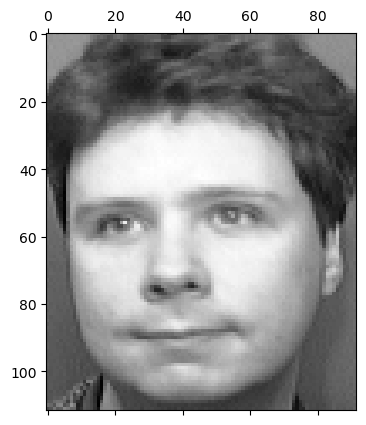

In [51]:
plt.matshow(dataset[0], cmap='gray') #sample data
print(dataset[0]) #we have a grayscale data, each entry is a pixel

In [52]:
X = np.stack([img.flatten() for img in dataset]) #collapse each image into a one dimensional array, set each face as a measurement type (like asking, what makes a good face?)

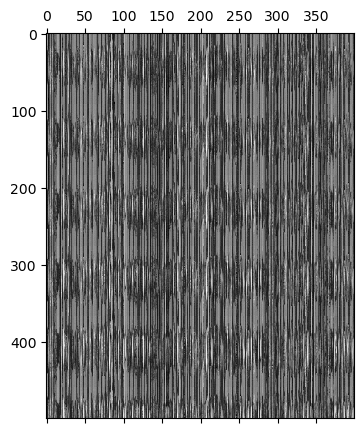

In [53]:
fig, ax = plt.subplots(figsize=(15,5)) 
ax.matshow(X.T[:500,:],cmap='gray') #each column is the one dimensional face, but why?? 
#well,, we can kind of see the bands and I guess it looks more like there's something ...
#we can extract from it (good data set shares characteristics, like where the eyebrows are etc I guess?)

In [54]:
pca = decomposition.PCA() 
pca.fit(X) #takes X.shape[0] samples with X.shape[1] features
#each face is a measurement type
#each pixel (across all faces) is a feature
print(X.shape)

(400, 10304)


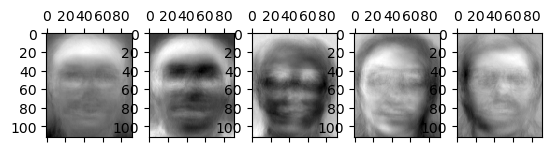

In [55]:
# Display PCs and turn it into an image
pcs = 5
img_rows, img_cols = dataset.shape[1], dataset.shape[2] #zeroth index is number of faces
fig, axes = plt.subplots(1,pcs)
for i, ax in enumerate(axes):
    ax.matshow(pca.components_[i].reshape(img_rows,img_cols),cmap='gray')

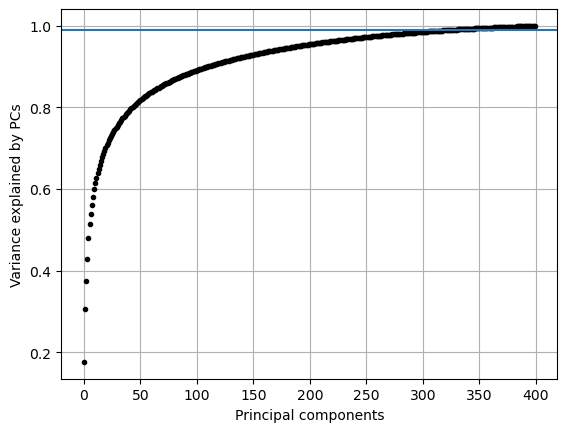

In [56]:
#PCs are rank ordered according to variance
plt.plot(np.cumsum(pca.explained_variance_ratio_), "k.") 
#explained_variance_ratio_ - percentage of variance explained by each PC
#"k." - black dot markers
plt.xlabel("Principal components")
plt.ylabel("Variance explained by PCs")
plt.axhline(0.99)
plt.grid()

In [57]:
def estimatePCA(percent,cumsum):
    for idx, sum_ in enumerate(cumsum):
        if percent <= sum_:return idx, np.round(sum_,3)

Text(0.5, 1.0, 'Original')

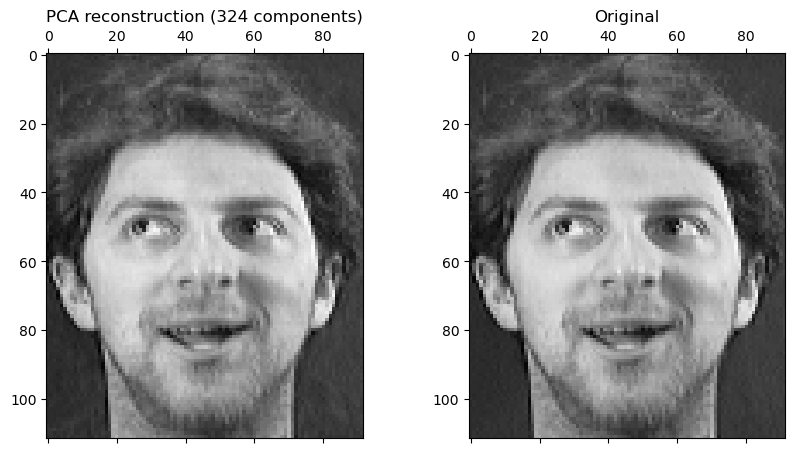

In [58]:
recons = pca.transform(X) #apply dimensionality reduction by projecting X onto principal components
lim = estimatePCA(.99,np.cumsum(pca.explained_variance_ratio_))[0]
#product = (recons[:,:lim] @ pca.components_[:lim,:])
product = np.matmul(recons[:,:lim],pca.components_[:lim,:])
reshaped = (product + pca.mean_).reshape(dataset.shape)
image_id = 4
fig,axs = plt.subplots(1,2, figsize = (10,5))
axs[0].matshow(reshaped[image_id], cmap = "gray")
axs[0].set_title("PCA reconstruction ("+str(lim) + " components)")
axs[1].matshow(dataset[image_id], cmap = "gray")
axs[1].set_title("Original")

Text(0.5, 1.0, 'Original')

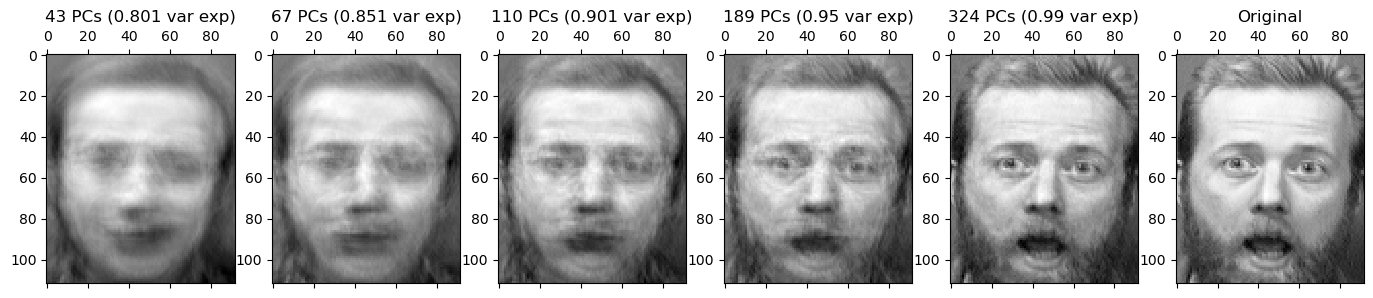

In [59]:
recon = pca.transform(X) #apply dimensionality reduction by projecting X onto principal components

varexps = [.80,.85,.90,.95,.99]
lims = [estimatePCA(varexp,np.cumsum(pca.explained_variance_ratio_)) for varexp in varexps]
prods = [np.matmul(recon[:,:lim[0]],pca.components_[:lim[0],:]) for lim in lims]
reshapeds = [(prod + pca.mean_).reshape(dataset.shape) for prod in prods]

image_id = 5 #choose arbitrary imagep
fig,axes = plt.subplots(1,len(varexps)+1, figsize = (17,6))
for idx, ax in enumerate(axes[:-1]):
    ax.matshow(reshapeds[idx][image_id],cmap = 'gray')
    ax.set_title(str(lims[idx][0])+ " PCs (" + str(lims[idx][1]) + " var exp)")
axes[-1].matshow(dataset[image_id], cmap = "gray")
axes[-1].set_title("Original")

We can see that increasing the number of PCs gives us a better reconstruction of the original image. Recall that the reconstructed data is presented as a linear combination of the PCs (that are rank-ordered based on variance explained) weighted by their projection coefficients .